In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import os


In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [28]:
df = pd.read_csv("../data/video-features.csv")
df.head(5)
print(f"Data shape: {df.shape}")

Data shape: (2051, 41)



Label distribution:
label
1    1051
0    1000
Name: count, dtype: int64


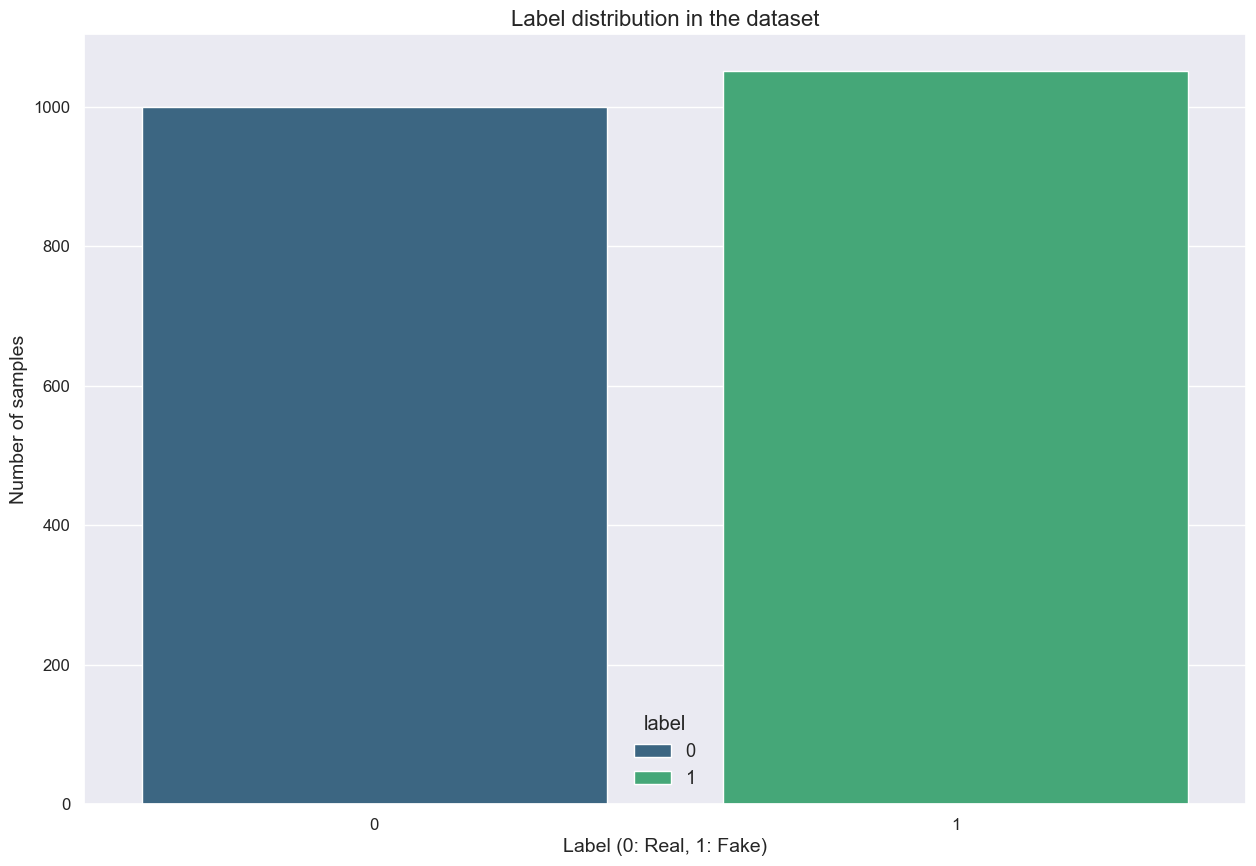

,hist_0,hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_7,hist_8,hist_9,...,hist_30,hist_31,blurness,mean_b,mean_g,mean_r,std_b,std_g,std_r,label
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,0.285897,0.070913,0.084565,0.080664,0.088186,0.090084,0.089075,0.106161,0.117472,0.128841,...,0.025103,0.047708,1785.103425,98.897461,105.285535,109.802322,60.102944,59.963863,58.848969,0.512433
std,0.400059,0.067544,0.089002,0.076251,0.081937,0.076216,0.071097,0.083445,0.094085,0.113202,...,0.055865,0.111721,2114.205466,36.606681,38.988379,40.544110,11.699598,12.938857,14.181394,0.499967
min,0.000000,0.000000,0.000009,0.003558,0.008294,0.005192,0.003177,0.003110,0.003124,0.003273,...,0.000000,0.000000,353.292764,24.316775,26.951075,28.632450,32.680748,30.953994,27.435740,0.000000
25%,0.000488,0.006285,0.022477,0.019629,0.026827,0.030707,0.032056,0.027249,0.029446,0.022524,...,0.000097,0.000006,839.669640,89.571035,97.625289,94.355859,51.534735,49.117994,49.833708,0.000000
50%,0.042983,0.048716,0.055541,0.067073,0.060568,0.066945,0.062753,0.076874,0.087468,0.102452,...,0.003507,0.007474,1439.411743,106.255354,114.137729,121.868582,60.938660,60.800961,58.601637,1.000000
75%,0.739933,0.111640,0.107725,0.130096,0.150394,0.143382,0.160448,0.179576,0.223092,0.226215,...,0.018012,0.028220,1850.104200,127.658330,134.598585,139.111746,68.432035,70.384630,66.186704,1.000000
max,0.998228,0.364230,0.414887,0.310111,0.403897,0.335887,0.269441,0.273358,0.355461,0.414542,...,0.250469,0.557875,14323.318730,174.391026,167.196662,171.439781,81.610321,83.376491,85.838947,1.000000


In [8]:
print("\nLabel distribution:")
label_counts = df['label'].value_counts()
print(label_counts)

plt.figure(figsize=(15, 10))
sns.countplot(x='label', data=df, palette='viridis', hue ='label')
plt.title('Label distribution in the dataset')
plt.xlabel('Label (0: Real, 1: Fake)')
plt.ylabel('Number of samples')
plt.show()

df.describe()

In [9]:
missing_values = df.isnull().sum()
print("\nCheck for missing values:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values in the data")


Check for missing values:
No missing values in the data


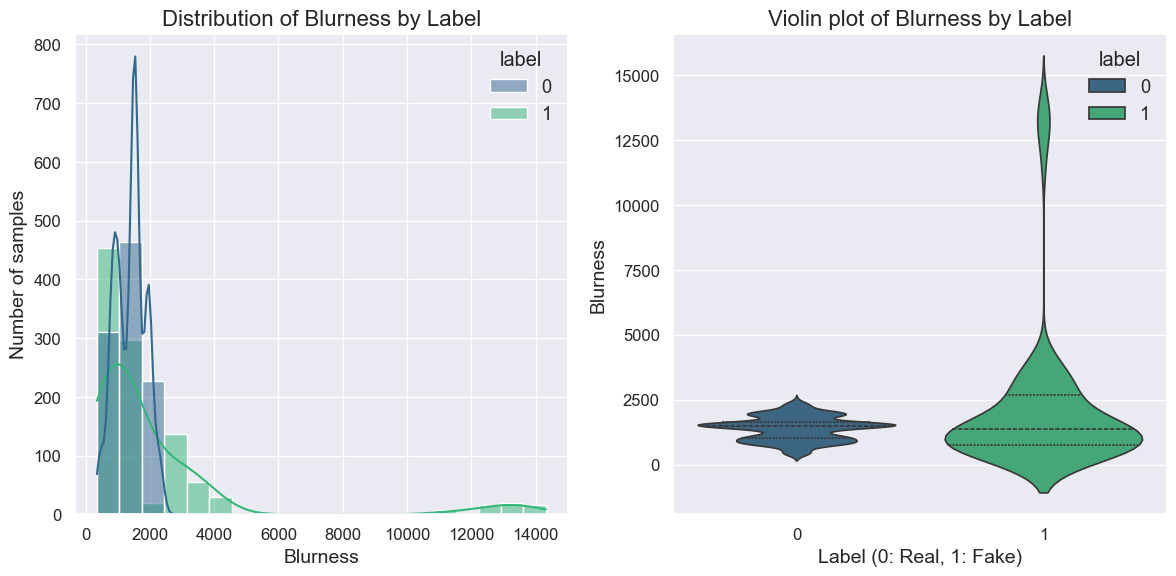

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='blurness', hue='label', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Blurness by Label')
plt.xlabel('Blurness')
plt.ylabel('Number of samples')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='label', y='blurness', inner='quartile', palette='viridis', hue='label')
plt.title('Violin plot of Blurness by Label')
plt.xlabel('Label (0: Real, 1: Fake)')
plt.ylabel('Blurness')

plt.tight_layout()
plt.show()

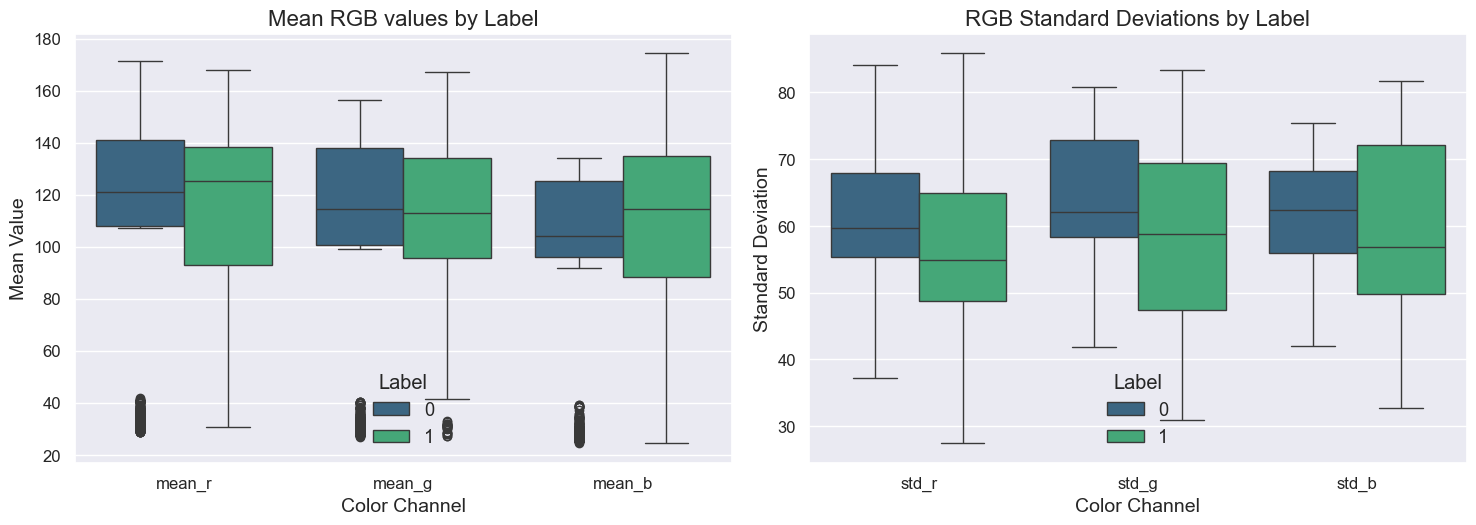

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df.melt(id_vars='label', value_vars=['mean_r', 'mean_g', 'mean_b']), 
            x='variable', y='value', hue='label', palette='viridis')
plt.title('Mean RGB values by Label')
plt.xlabel('Color Channel')
plt.ylabel('Mean Value')
plt.legend(title='Label')

plt.subplot(2, 2, 2)
sns.boxplot(data=df.melt(id_vars='label', value_vars=['std_r', 'std_g', 'std_b']), 
            x='variable', y='value', hue='label', palette='viridis')
plt.title('RGB Standard Deviations by Label')
plt.xlabel('Color Channel')
plt.ylabel('Standard Deviation')
plt.legend(title='Label')

plt.tight_layout()
plt.show()

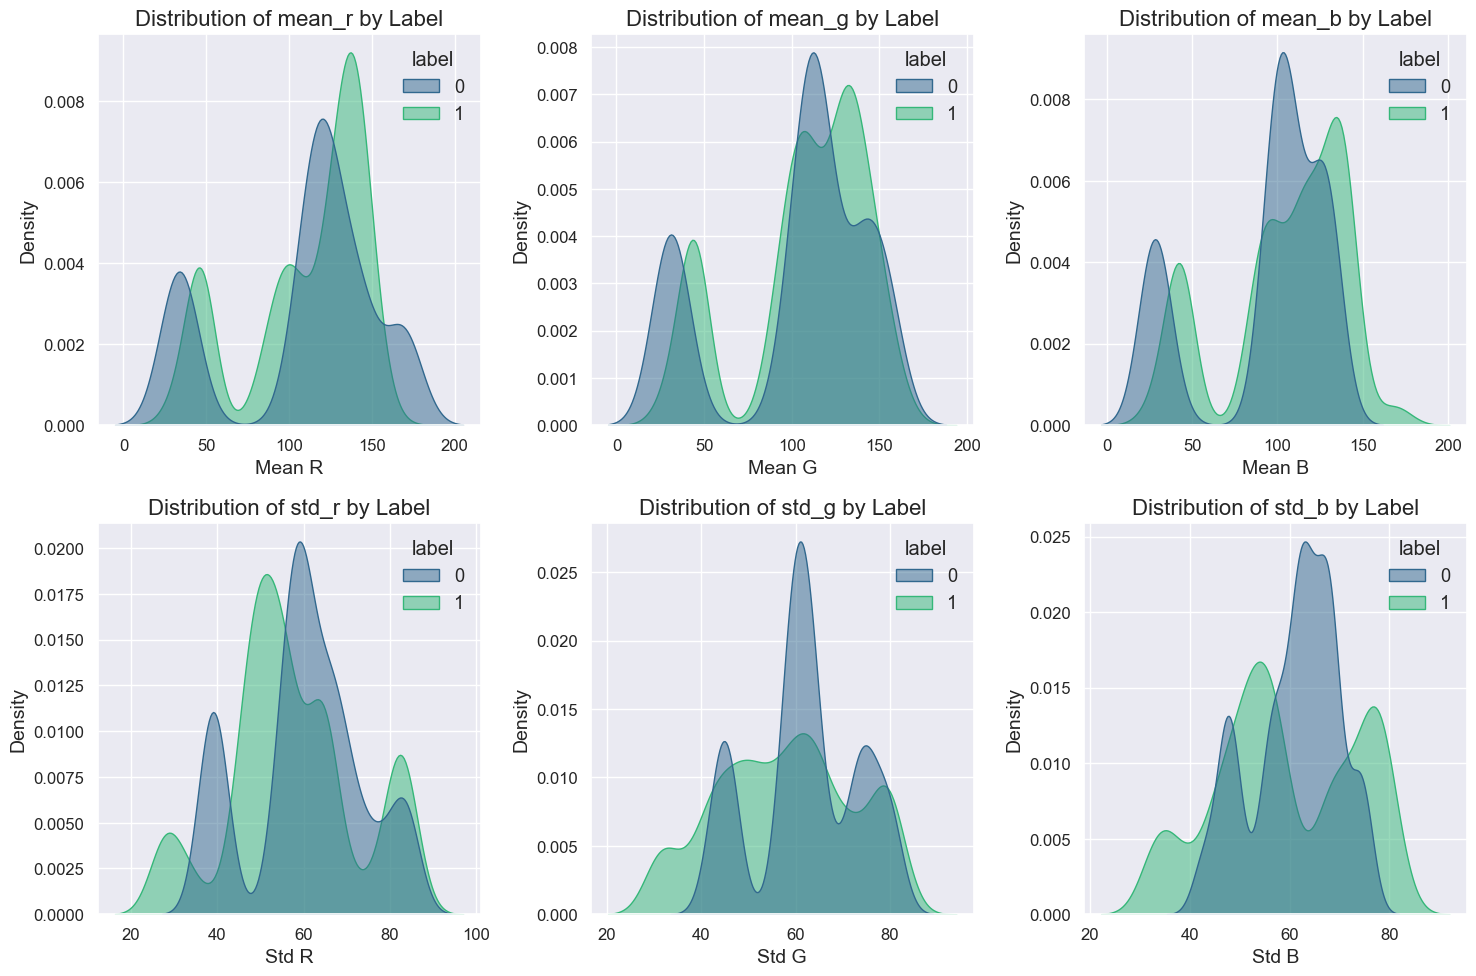

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.kdeplot(data=df, x='mean_r', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of mean_r by Label')
plt.xlabel('Mean R')

plt.subplot(2, 3, 2)
sns.kdeplot(data=df, x='mean_g', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of mean_g by Label')
plt.xlabel('Mean G')

plt.subplot(2, 3, 3)
sns.kdeplot(data=df, x='mean_b', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of mean_b by Label')
plt.xlabel('Mean B')

plt.subplot(2, 3, 4)
sns.kdeplot(data=df, x='std_r', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of std_r by Label')
plt.xlabel('Std R')

plt.subplot(2, 3, 5)
sns.kdeplot(data=df, x='std_g', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of std_g by Label')
plt.xlabel('Std G')

plt.subplot(2, 3, 6)
sns.kdeplot(data=df, x='std_b', hue='label', fill=True, alpha=0.5, palette='viridis')
plt.title('Distribution of std_b by Label')
plt.xlabel('Std B')

plt.tight_layout()
plt.show()

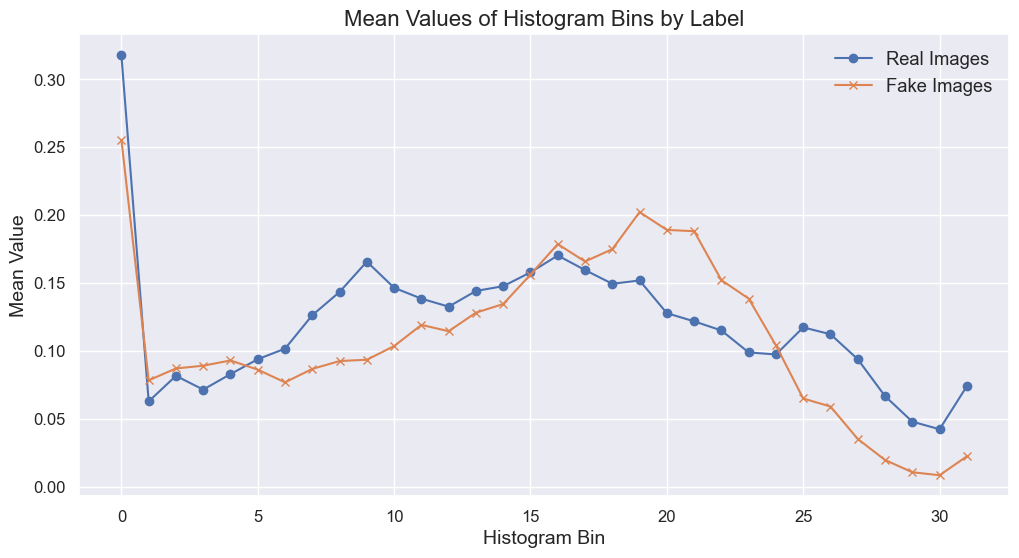

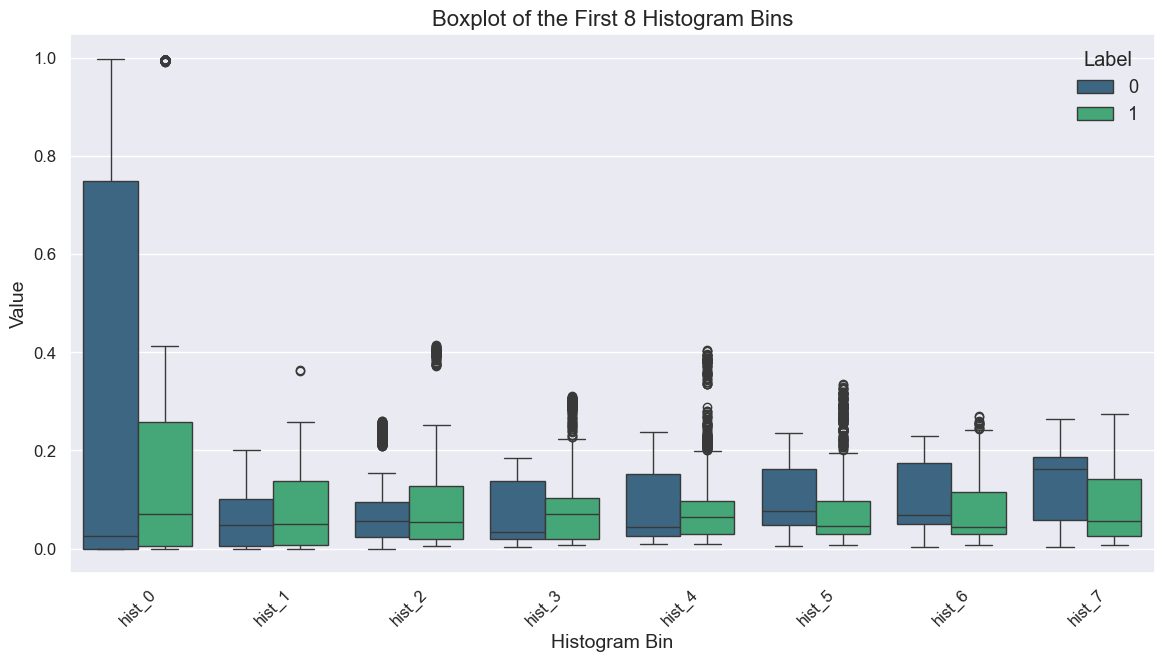

In [14]:
hist_cols = [f'hist_{i}' for i in range(32)]

mean_hist_real = df[df['label'] == 0][hist_cols].mean()
mean_hist_fake = df[df['label'] == 1][hist_cols].mean()

plt.figure(figsize=(12, 6))
plt.plot(range(32), mean_hist_real, label='Real Images', marker='o')
plt.plot(range(32), mean_hist_fake, label='Fake Images', marker='x')
plt.title('Mean Values of Histogram Bins by Label')
plt.xlabel('Histogram Bin')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df.melt(id_vars='label', value_vars=[f'hist_{i}' for i in range(8)]), 
            x='variable', y='value', hue='label', palette='viridis')
plt.title('Boxplot of the First 8 Histogram Bins')
plt.xlabel('Histogram Bin')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()


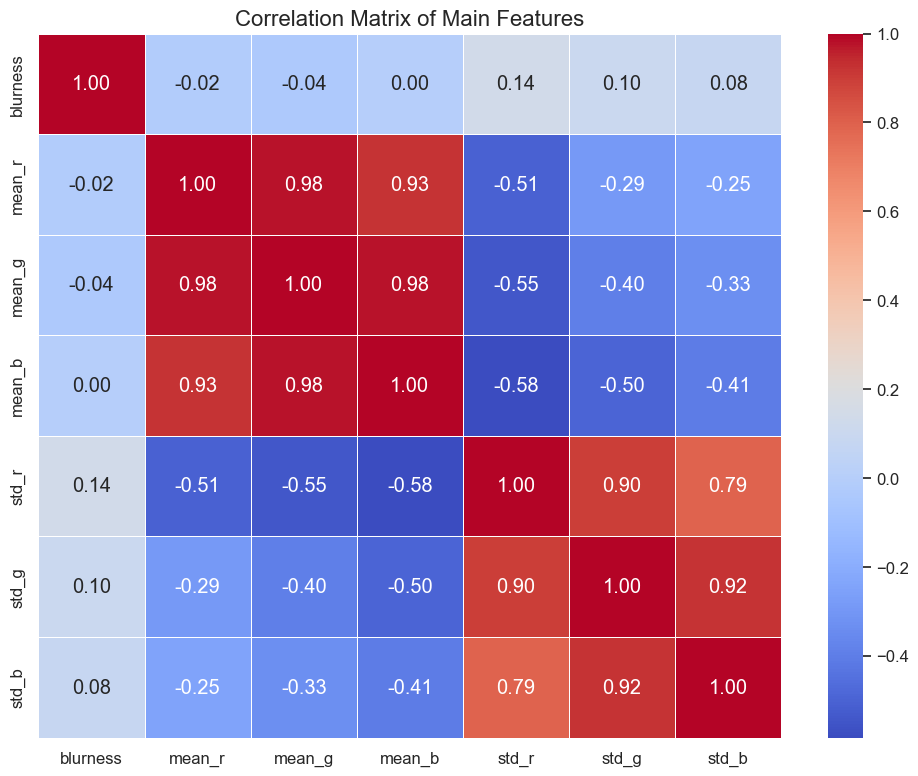

In [15]:
main_features = ['blurness', 'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']
correlation_matrix = df[main_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Main Features')
plt.tight_layout()
plt.show()